<a href="https://colab.research.google.com/github/viktorjovev/ConvexOptimization/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%BE_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
def objective_function(params):
    """
    Compute the value of the objective function at the given parameters.
    
    Args:
    params: The parameters to evaluate the objective function with.
    
    Returns:
    The value of the objective function at the given parameters.
    """
    # Compute the value of the objective function using the given parameters.
    lambda_1 = params[0]
    lambda_2 = params[1]
    value = -(1/4.0)*(-2*(lambda_1*lambda_1)+2*lambda_1*(2+lambda_2)-lambda_2*(8+5*lambda_2))
    return value

def gradient(objective_function, params):
    """
    Compute the gradient of the objective function with respect to the given parameters.
    
    Args:
    objective_function: The objective function to compute the gradient of.
    params: The parameters to compute the gradient with respect to.
    
    Returns:
    The gradient of the objective function with respect to the parameters.
    """
    # Compute the gradient of the objective function with respect to each parameter.
    lambda_1 = params[0]
    lambda_2 = params[1]
    grad = np.array([-(1/4.0)*(-4*lambda_1+2*(2+lambda_2)),-(1/4.0)*(2*lambda_1-8-10*lambda_2)])
    
    return grad

In [ ]:
def gradient_descent(objective_function, gradient_function, initial_params, learning_rate, max_iterations):
    """
    Perform gradient descent optimization to minimize the objective function.
    
    Args:
    objective_function: The objective function to minimize.
    gradient_function: The function to compute the gradient of the objective function.
    hessian_function: The function to compute the Hessian matrix of the objective function.
    initial_params: The initial values of the parameters to optimize.
    learning_rate: The learning rate to use in the gradient descent algorithm.
    max_iterations: The maximum number of iterations to run the algorithm for.
    
    Returns:
    The optimized values of the parameters and the final value of the objective function.
    """
    # Initialize the parameters to the initial values.
    params = initial_params
    steps = []
    
    # Initialize the iteration counter to 0.
    iteration = 0
    
    # Run the gradient descent algorithm until the maximum number of iterations is reached.
    while iteration < max_iterations:
        # Compute the gradient of the objective function with respect to the current parameters.
        grad = gradient(objective_function, params)
        
        # Update the parameters using the gradient and the Hessian matrix.
        params -= grad * learning_rate
        steps.append(list(params))
        
        # Increment the iteration counter.
        iteration += 1
    
    # Compute the final value of the objective function.
    
    # Return the optimized values of the parameters and the final value of the objective function.
    return params,steps


In [ ]:
initial_params = np.array([3.0,1.0])
learning_rate = 0.1

# Set the maximum number of iterations.
max_iterations = 200

# Run the gradient descent algorithm.
params, steps= gradient_descent(objective_function, gradient, initial_params, learning_rate, max_iterations)

# Print the optimized parameters and final value of the objective function.
print("Optimized parameters:", params)
print("Steps", steps)



Optimized parameters: [ 0.66666672 -0.66666665]
Steps [[2.85, 0.7], [2.7, 0.4674999999999999], [2.553375, 0.2856249999999999], [2.41231875, 0.14188749999999992], [2.27818125, 0.027031562499999925], [2.1517147031249997, -0.06581726562500008], [2.0332523695312497, -0.1417772140625001], [1.9228382718749997, -0.20467029207031262], [1.820320930083984, -0.2573608054589845], [1.7254207968026363, -0.3020045575900392], [1.6377784892428706, -0.3402323783523976], [1.5569890214009636, -0.3732853593021547], [1.4826258512957595, -0.40211456840656784], [1.4142575377458553, -0.42745463374013787], [1.3514590522842629, -0.4498780984178106], [1.2938192421349461, -0.46983562119914485], [1.2409455368614943, -0.4876857537926113], [1.1924666954857144, -0.5037170385013838], [1.1480341740120736, -0.5181644441017521], [1.1073225344057787, -0.5312216243757104], [1.0700291997464153, -0.5430500915614939], [1.035873775193699, -0.5537861086837996], [1.0045970922401393, -0.5635458927531648], [0.9759600883784671, -0.5

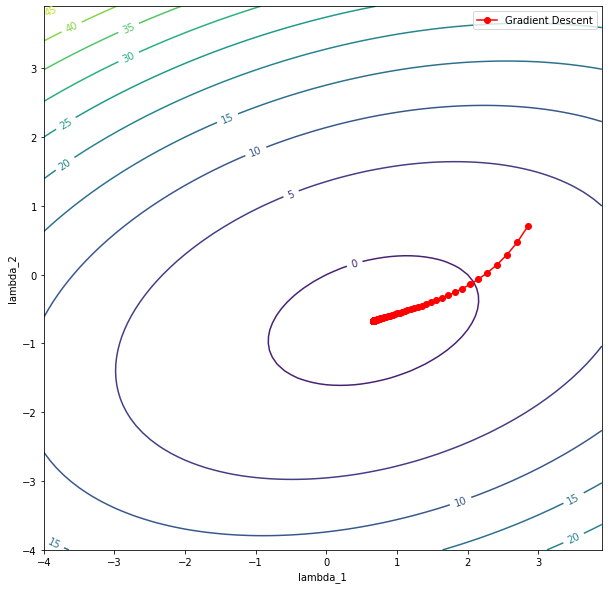

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib inline

x_vals = np.arange(-4, 4, 0.1)
y_vals = np.arange(-4, 4, 0.1)

# Create a meshgrid of the x, y, and z values.
X, Y= np.meshgrid(x_vals, y_vals)

# Compute the value of the objective function at each point in the meshgrid.
values = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
            values[i,j] = objective_function([X[i,j], Y[i,j]])

fig, ax = plt.subplots(figsize=(10,10))
contour_plot = ax.contour(X, Y, values, levels=10)
ax.clabel(contour_plot, inline=1, fontsize=10)
ax.set_xlabel('lambda_1')
ax.set_ylabel('lambda_2')


steps = np.array(steps)
plt.plot(steps[:, 0], steps[:, 1], '-o', color='red', label='Gradient Descent')
plt.legend()

plt.show()